# Fokker-Planck - VarQITE all $\chi_0$ values

In this notebook we show the VarQITE results for $\chi_0=10^{-3}$ and $\chi_0=10^{-2}$.

In [1]:
import numpy as np
import pickle
from numpy import exp, sqrt, pi, log
import matplotlib.pyplot as plt
import glob as glob
import h5py

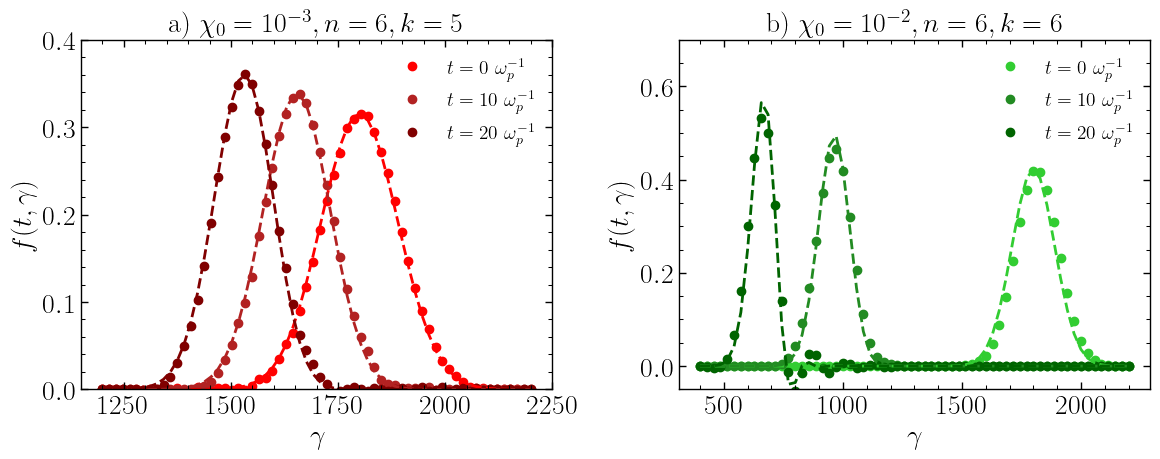

In [21]:
plt.style.use("style.txt")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# chi=1e-3
colors = ['red', 'firebrick', 'maroon']
infile = open('VarQITE_chi3','rb')
nqubits, klayers, chi0, tdim, tmax, gmlst, nparams, steps0, f0_target, f0_target_centered, fPDElst, thetalst, mom1lst, mom2lst, tlst_vqs, fsnap1,fsnap2,fsnap3 = pickle.load(infile)
#
axes[0].plot(gmlst, fsnap1, 'o', label=r'$t=0~\omega_p^{-1}$', color=colors[0] )
axes[0].plot(gmlst, fsnap2, 'o', label=r'$t=10~\omega_p^{-1}$', color=colors[1] )
axes[0].plot(gmlst, fsnap3, 'o', label=r'$t=20~\omega_p^{-1}$', color=colors[2] )
#
yth = fPDElst[0,:]; yth /= np.sign(np.trapz(yth)); yth /= sqrt(np.sum( np.abs(yth)**2 ))
axes[0].plot(gmlst, yth, '--', color=colors[0] )
yth = fPDElst[int(tdim/2),:]; yth /= np.sign(np.trapz(yth)); yth /= sqrt(np.sum( np.abs(yth)**2 ))
axes[0].plot(gmlst, yth, '--', color=colors[1] )
yth = fPDElst[int(tdim*0.99999),:]; yth /= np.sign(np.trapz(yth)); yth /= sqrt(np.sum( np.abs(yth)**2 ))
axes[0].plot(gmlst, yth, '--', color=colors[2] )
#
axes[0].set_xlabel(r'$\gamma$')
axes[0].set_ylabel(r'$f(t,\gamma)$')
axes[0].legend(frameon=False, fontsize=14)
axes[0].set_title(r'a) $\chi_0=10^{-3}'+', n={}, k={}$'.format(nqubits, klayers)) #, tdim={}

# chi=1e-2
colors = ["LimeGreen", "ForestGreen", "DarkGreen"]
infile = open('VarQITE_chi2_n6','rb')
nqubits, klayers, chi0, tdim, tmax, gmlst, nparams, steps0, f0_target, f0_target_centered, fPDElst, thetalst, mom1lst, mom2lst, tlst_vqs, fsnap1,fsnap2,fsnap3 = pickle.load(infile)
#
axes[1].plot(gmlst, fsnap1, 'o', label=r'$t=0~\omega_p^{-1}$', color=colors[0] )
axes[1].plot(gmlst, fsnap2, 'o', label=r'$t=10~\omega_p^{-1}$', color=colors[1] )
axes[1].plot(gmlst, fsnap3, 'o', label=r'$t=20~\omega_p^{-1}$', color=colors[2] )
#
yth = fPDElst[0,:]; yth /= np.sign(np.trapz(yth)); yth /= sqrt(np.sum( np.abs(yth)**2 ))
axes[1].plot(gmlst, yth, '--', color=colors[0] )
yth = fPDElst[int(tdim/2),:]; yth /= np.sign(np.trapz(yth)); yth /= sqrt(np.sum( np.abs(yth)**2 ))
axes[1].plot(gmlst, yth, '--', color=colors[1] )
yth = fPDElst[int(tdim*0.99999),:]; yth /= np.sign(np.trapz(yth)); yth /= sqrt(np.sum( np.abs(yth)**2 ))
axes[1].plot(gmlst, yth, '--', color=colors[2] )
#
axes[1].set_xlabel(r'$\gamma$')
axes[1].set_ylabel(r'$f(t,\gamma)$')
axes[1].legend(frameon=False, ncol=1, fontsize=14, loc='upper right')
axes[1].set_title(r"b) $\chi_0=10^{-2}"+', n={}, k={}$'.format(nqubits, klayers)) #, tdim={}'

axes[0].set_ylim([0,0.4])
axes[1].set_ylim([-0.05,0.7])

plt.tight_layout()
#plt.savefig('FokkerPlanck_VarQITE_distributions.pdf',transparent=True)
plt.show()

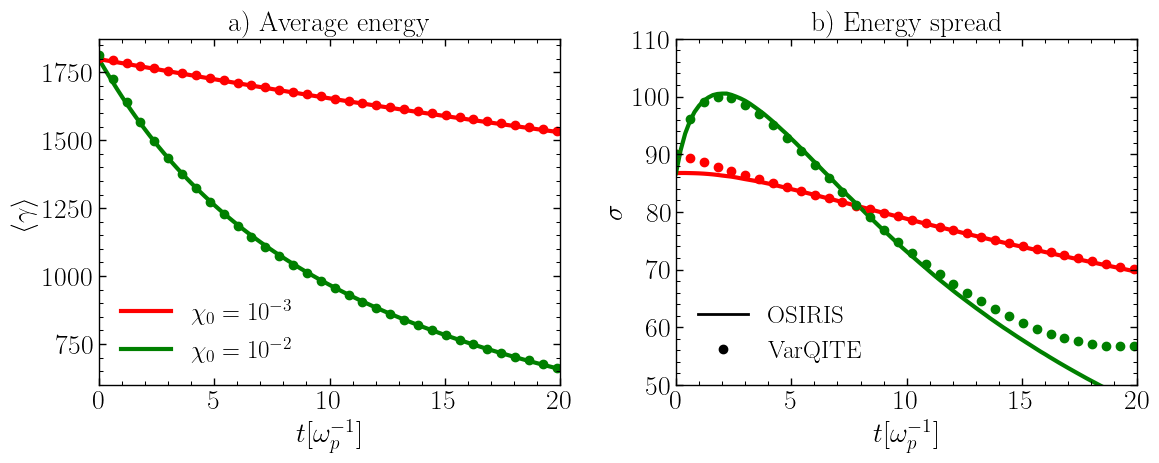

In [17]:
plt.style.use("style.txt")
OSIRISlinewidth = 3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

files_electrons = glob.glob("OSIRIS/osiris_s90/chi3/MS/PHA/gamma/electrons/*.h5")
files_electrons.sort()
filef = h5py.File(files_electrons[0], 'r')
dt = filef['SIMULATION'].attrs["DT"][0]
AXIS1 = np.array(filef['AXIS']['AXIS1'])
y = np.abs(np.array(filef['gamma']))
x = np.linspace(np.min(AXIS1),np.max(AXIS1),len(y))
tmax = 20.0
tlst = np.linspace(0,tmax,len(files_electrons))
avglst = np.zeros(len(files_electrons))
siglst = np.zeros(len(files_electrons))
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    TIME = filef.attrs["TIME"][0]
    y = np.abs(np.array(filef['gamma']))
    avg = np.sum(x * y)/np.sum(y)
    sig = sqrt( np.sum( (x-avg)**2 * y)/np.sum(y) )
    avglst[i] = avg
    siglst[i] = sig
axes[0].plot(tlst, avglst, color='r', linewidth=OSIRISlinewidth, label=r'$\chi_0=10^{-3}$')
axes[1].plot(tlst, siglst, color='r', linewidth=OSIRISlinewidth)


files_electrons = glob.glob("OSIRIS/osiris_s90/chi2/MS/PHA/gamma/electrons/*.h5")
files_electrons.sort()
filef = h5py.File(files_electrons[0], 'r')
dt = filef['SIMULATION'].attrs["DT"][0]
AXIS1 = np.array(filef['AXIS']['AXIS1'])
y = np.abs(np.array(filef['gamma']))
x = np.linspace(np.min(AXIS1),np.max(AXIS1),len(y))
tmax = 20.0
tlst = np.linspace(0,tmax,len(files_electrons))
avglst = np.zeros(len(files_electrons))
siglst = np.zeros(len(files_electrons))
for i in range(len(files_electrons)):
    filef = h5py.File(files_electrons[i], 'r')
    TIME = filef.attrs["TIME"][0]
    y = np.abs(np.array(filef['gamma']))
    avg = np.sum(x * y)/np.sum(y)
    sig = sqrt( np.sum( (x-avg)**2 * y)/np.sum(y) )
    avglst[i] = avg
    siglst[i] = sig
axes[0].plot(tlst, avglst, color='g', linewidth=OSIRISlinewidth, label=r'$\chi_0=10^{-2}$')
axes[1].plot(tlst, siglst, color='g', linewidth=OSIRISlinewidth)
#

indxs = 12
infile = open("VarQITE_chi3",'rb')
nqubits, klayers, chi0, tdim, tmax, gmlst, nparams, steps0, f0_target, f0_target_centered, fPDElst, thetalst, mom1lst, mom2lst, tlst_vqs, fsnap1,fsnap2,fsnap3 = pickle.load(infile)
axes[0].plot(tlst_vqs[::indxs], mom1lst[::indxs], 'o', color='r')
axes[1].plot(tlst_vqs[::indxs], mom2lst[::indxs], 'o', color='r')
#
infile = open("VarQITE_chi2_n6",'rb')
nqubits, klayers, chi0, tdim, tmax, gmlst, nparams, steps0, f0_target, f0_target_centered, fPDElst, thetalst, mom1lst, mom2lst, tlst_vqs, fsnap1,fsnap2,fsnap3 = pickle.load(infile)
axes[0].plot(tlst_vqs[::indxs], mom1lst[::indxs], 'o', color='g')
axes[1].plot(tlst_vqs[::indxs], mom2lst[::indxs], 'o', color='g')

axes[1].plot(tlst, tlst-1e6, '-', color='k', label=r'OSIRIS')
axes[1].plot(tlst, tlst-1e6, 'o', color='k', label=r'VarQITE')

axes[0].legend(loc='lower left', fontsize=18)
axes[1].legend(loc='lower left', fontsize=18)
axes[0].set_xlabel(r'$t[\omega_p^{-1}]$')
axes[1].set_xlabel(r'$t[\omega_p^{-1}]$')
axes[0].set_ylabel(r'$\langle \gamma \rangle$')
axes[1].set_ylabel(r'$\sigma$')
axes[0].set_xlim([0,20])
axes[1].set_xlim([0,20])
axes[1].set_ylim([50,110])
#axes[0].set_ylim([0,2])
#axes[1].set_ylim([0,300])
asp = 3/4
xmin, xmax = axes[0].get_xlim()
ymin, ymax = axes[0].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[0].set_aspect(aspect=asp/axesratio)
xmin, xmax = axes[1].get_xlim()
ymin, ymax = axes[1].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[1].set_aspect(aspect=asp/axesratio)
axes[0].set_title(r'a) Average energy')
axes[1].set_title(r'b) Energy spread')
plt.tight_layout()
#plt.savefig('FokkerPlanck_VarQITE_moments.pdf',transparent=True)
plt.show()

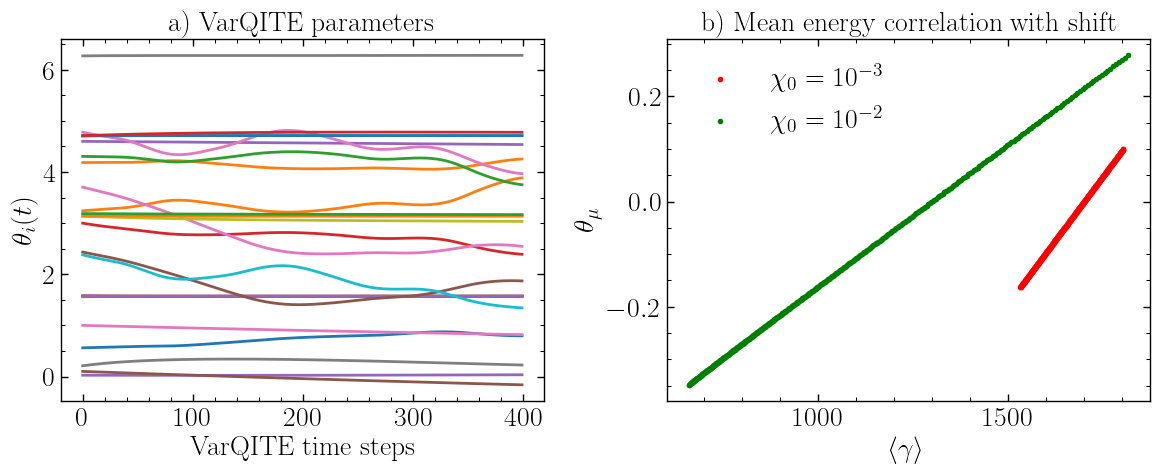

In [46]:
plt.style.use("style.txt")
OSIRISlinewidth = 3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

indxs = 1
infile = open("VarQITE_chi3",'rb')
nqubits, klayers, chi0, tdim, tmax, gmlst, nparams, steps0, f0_target, f0_target_centered, fPDElst, thetalst, mom1lst, mom2lst, tlst_vqs, fsnap1,fsnap2,fsnap3 = pickle.load(infile)

axes[0].plot( thetalst )
axes[1].scatter(mom1lst, thetalst[:,-2], marker='.', label=r'$\chi_0=10^{-3}$', color='r')

infile = open("VarQITE_chi2_n6",'rb')
nqubits, klayers, chi0, tdim, tmax, gmlst, nparams, steps0, f0_target, f0_target_centered, fPDElst, thetalst, mom1lst, mom2lst, tlst_vqs, fsnap1,fsnap2,fsnap3 = pickle.load(infile)
axes[1].scatter(mom1lst, thetalst[:,-2], marker='.', label=r'$\chi_0=10^{-2}$', color='g')
#
axes[1].legend(loc='upper left')
axes[0].set_xlabel(r'VarQITE time steps')
axes[0].set_ylabel(r'$\theta_i(t)$')
axes[1].set_xlabel(r'$\langle \gamma \rangle$')
axes[1].set_ylabel(r'$\theta_\mu$')
#axes[0].set_xlim([0,20])
#axes[1].set_xlim([0,20])
#axes[1].set_ylim([50,110])
#axes[0].set_ylim([0,2])
#axes[1].set_ylim([0,300])
asp = 3/4
xmin, xmax = axes[0].get_xlim()
ymin, ymax = axes[0].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[0].set_aspect(aspect=asp/axesratio)
xmin, xmax = axes[1].get_xlim()
ymin, ymax = axes[1].get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes[1].set_aspect(aspect=asp/axesratio)
axes[0].set_title(r'a) VarQITE parameters')
axes[1].set_title(r'b) Mean energy correlation with shift')

plt.tight_layout()
#plt.savefig('FokkerPlanck_VarQITE_parameters_advection.pdf',transparent=True)
plt.show()